# Traffic Signs Dataset (Argentina)
In this notebook, I'm going to be organizing my traffic signs dataset, creating pickle files, etc.

In [8]:
import os
import cv2
import csv
import glob
import pickle
import random
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)

In [16]:
# Folders path
dataset_path = '/home/arian/Documents/proyecto-integrador/data/yolo/0-crops'

# Image size
IMG_SIZE = 64

In [17]:
classes = {
    'max-90': 6,
    'max-50': 3,
    'max-40': 2,
    'max-110': 8,
    'max-30': 1,
    'max-100': 7,
    'max-130': 10,
    'max-60': 4,
    'max-120': 9,
    'max-20': 0,
    'max-80': 5,
}

In [18]:
print(len(classes.keys()))

11


In [19]:
print(classes['max-60'])

4


In [21]:
classes_folder = glob.glob(os.path.join(dataset_path, '*'))

train_data = []

for class_folder in tqdm_notebook(classes_folder):
    file_filter = '*.jpg'
    file_list = glob.glob(os.path.join(class_folder, file_filter))
    
    class_name = os.path.basename(class_folder)
    
    if class_name.startswith('max'):
        for image_path in file_list:
            item = []

            img = cv2.imread(image_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img[...,::-1]

            item.append(img)
            item.append(classes[class_name])

            train_data.append(item)

In [22]:
# Pickle folder 
data_folder = './data/maxspeed/'
train_pickle_file = 'train.p' 
valid_pickle_file = 'valid.p'
test_pickle_file = 'test.p'

In [23]:
from ipy_table import *

# Auxiliary ists
temp = []
classes_list = []

# Convert the dictionary to a list
for key, value in sorted(classes.items()):
    temp = [key,value]
    classes_list.append(temp)

# Create table with make_table
make_table(classes_list)

# Apply some styles to the table after it is created
set_column_style(0, width='100', bold=True, color='hsla(225, 80%, 94%, 1)')
set_column_style(1, width='100')

# Render the table
render()

max-100,7
max-110,8
max-120,9
max-130,10
max-20,0
max-30,1
max-40,2
max-50,3
max-60,4
max-80,5
max-90,6


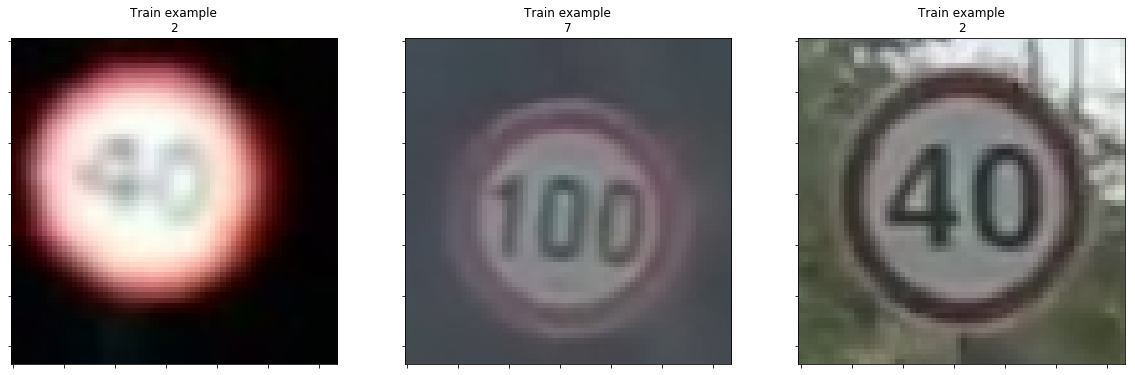

In [30]:
# Verify data
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

index = random.randrange(0, len(train_data))
ax1.imshow(train_data[index][0])
ax1.set_title('Train example\n' + str(train_data[index][1]))
ax1.set_yticklabels([])
ax1.set_xticklabels([])

index = random.randrange(0, len(train_data))
ax2.imshow(train_data[index][0])
ax2.set_title('Train example\n' + str(train_data[index][1]))
ax2.set_yticklabels([])
ax2.set_xticklabels([])

index = random.randrange(0, len(train_data))
ax3.imshow(train_data[index][0])
ax3.set_title('Train example\n' + str(train_data[index][1]))
ax3.set_yticklabels([])
ax3.set_xticklabels([])

plt.show()

In [39]:
# Transform list into numpy arrays
train_data = np.array(train_data)

# Save dictionaries to pickle files
pickle_file_path = os.path.join(data_folder, train_pickle_file)
pickle_file = open(pickle_file_path, 'wb')
pickle.dump(train_data, pickle_file)